# Model Post-Fitting: Examining Residuals

### by

# Jeff Gross

based on SAS e-learning

In [3]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";

<img src="files/outliers_1.png">

<img src="files/outliers_2.png">

<img src="files/outliers_3.png">

<img src="files/outliers_4.png">

<img src="files/outliers_5.png">

<img src="files/outliers_6.png">

<img src="files/outliers_7.png">

<img src="files/outliers_8.png">

<img src="files/outliers_9.png">

<img src="files/outliers_10.png">

<img src="files/outliers_11.png">

<img src="files/outliers_12.png">

### Task: Using Statdata.BodyFat2, run a regression model of PctBodyFat2 on Abdomen, Weight, Wrist, and Forearm. Use plots to identify potential influential observations based on the suggested cutoff values. Output residuals to a data set named Influential, subset the data set to select only observations that are potentially influential outliers, and print your results. 

### Result: In the RStudent by Predicted for PctBodyFat2 scatter plot, only a modest number of observations are further than 2 standard error units from the mean of 0. In the Cook's D for PctBodyFat2 plot, there are 10 labeled outliers, but observation 39 is clearly the most extreme. In the Influence Diagnostics for PctBodyFat2 plot, the same observations are shown to be influential by the DFFITS statistic.


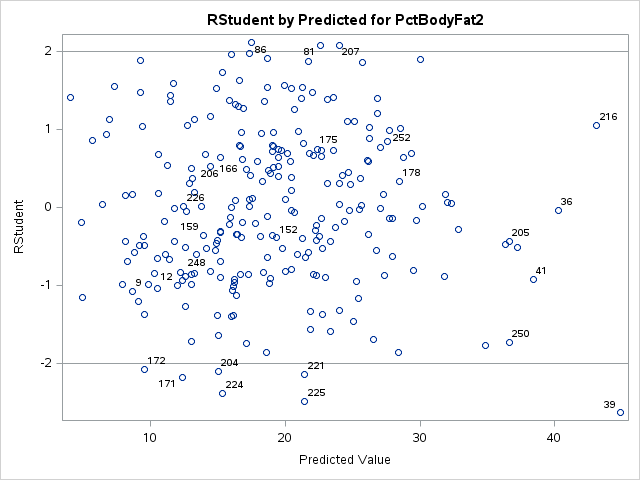
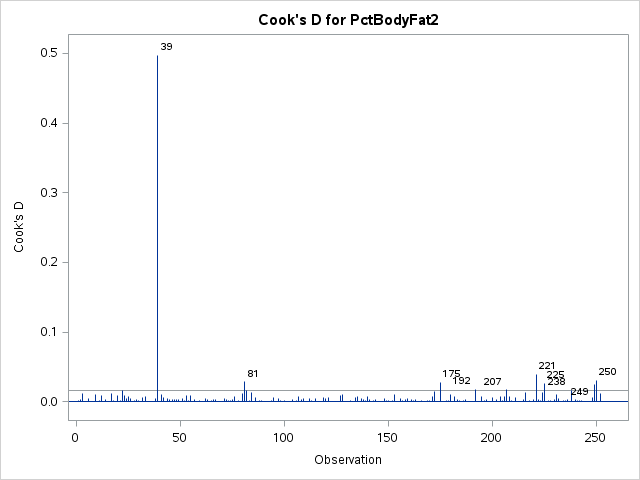
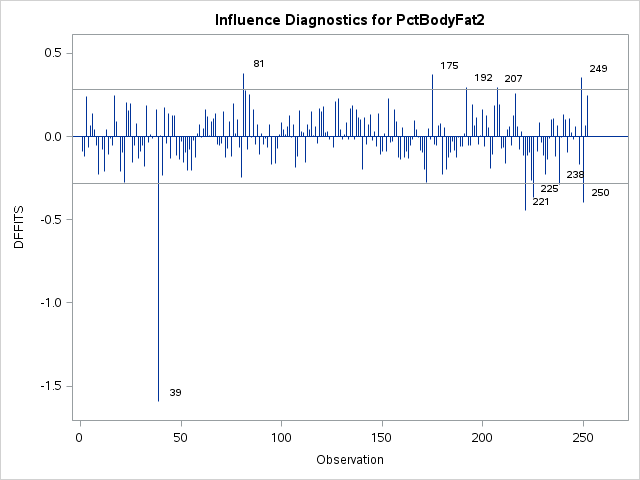
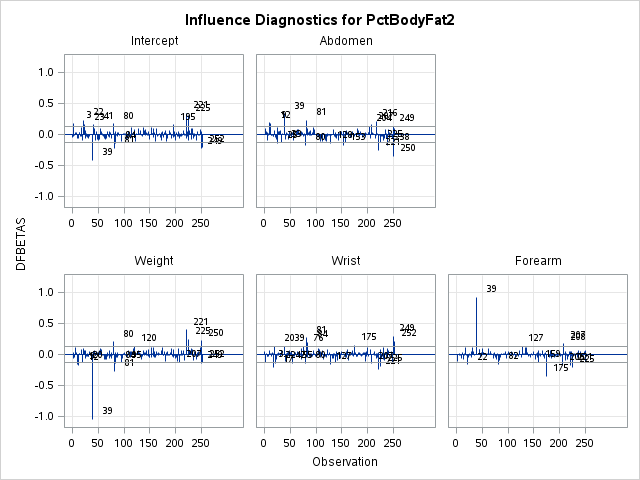

In [5]:
ods graphics on;
ods output RSTUDENTBYPREDICTED=Rstud 
           COOKSDPLOT=Cook
           DFFITSPLOT=Dffits 
           DFBETASPANEL=Dfbs;
proc reg data=Statdata.BodyFat2 
         plots(only label)=
              (RSTUDENTBYPREDICTED 
               COOKSD 
               DFFITS 
               DFBETAS);
    FORWARD: model PctBodyFat2
                 = Abdomen Weight Wrist Forearm;
    id Case;
    title 'FORWARD Model - Plots of Diagnostic Statistics';
run;
quit;

data influential;
/*  Merge datasets from above.*/
    merge Rstud
          Cook 
          Dffits
		  Dfbs;
    by observation;

/*  Flag observations that have exceeded at least one cutpoint;*/
    if (ABS(Rstudent)>3) or (Cooksdlabel ne ' ') or Dffitsout then flag=1;
    array dfbetas{*} _dfbetasout: ;
    do i=2 to dim(dfbetas);
        if dfbetas{i} then flag=1;
    end;

/*  Set to missing values of influence statistics for those*/
/*  who have not exceeded cutpoints;*/
    if ABS(Rstudent)<=3 then RStudent=.;
    if Cooksdlabel eq ' ' then CooksD=.;

/*  Subset only observations that have been flagged.*/
    if flag=1;
    drop i flag;
run;

proc print data=influential;
    id observation ID1;
    var Rstudent CooksD Dffitsout _dfbetasout:; 
run;